In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'C:\Users\asadolle\Documents\Dataanalysts\movies.csv')

In [46]:
#look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,69,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,79,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,56,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,75,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,78,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [3]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#LETS SEE If there is any missing data

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:


# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
#change data type of a column
#print(df["budget"])
#df = df.fillna()
#df['budget'] = df['budget'].fillna(0)
df = df.dropna()
df['budget']=df['budget'].astype('int64') 


In [7]:
print(df["budget"])

0        19000000
1         4500000
2        18000000
3         3500000
4         6000000
          ...    
7648     90000000
7649     85000000
7650    175000000
7651    135000000
7652     80000000
Name: budget, Length: 5421, dtype: int64


In [8]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
df["gross"]=df["gross"].astype('int64')

In [12]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [13]:
print(df['released'])

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object


In [15]:
df['year']=df['released'].astype(str).str[-20:-15]

In [16]:
df['released'].astype(str).str[:4]

0       June
1       July
2       June
3       July
4       July
        ... 
7648    Janu
7649    Febr
7650    Janu
7651    Febr
7652    Augu
Name: released, Length: 5421, dtype: object

In [18]:
df.sort_values(by=['score'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1994,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,Who's Your Caddy?,PG-13,Comedy,2007,"July 27, 2007 (United States)",2.2,15000.0,Don Michael Paul,Don Michael Paul,Big Boi,United States,7000000,5713425,Ascendant Pictures,93.0
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000.0,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000,4928883,19 Entertainment,81.0
4342,House of the Dead,R,Action,2003,"October 10, 2003 (United States)",2.1,36000.0,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000,13818181,Boll Kino Beteiligungs GmbH & Co. KG,90.0
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000,34816824,Lionsgate,87.0


In [17]:
#pd.set_option('display.max_rows',None)

In [19]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


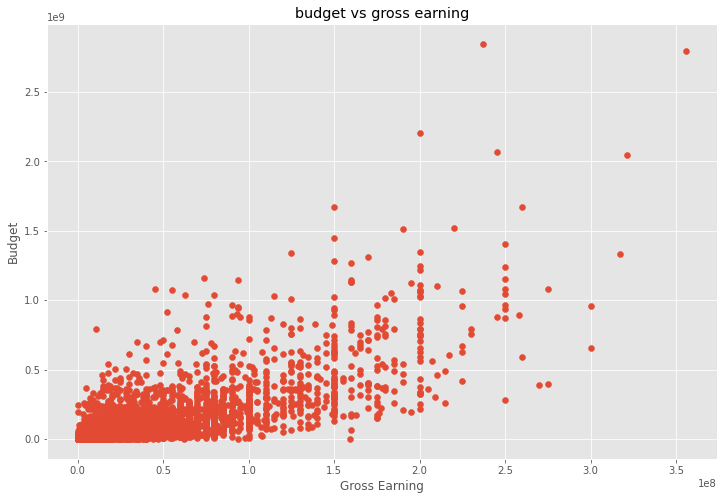

In [20]:
#scatter plot
df=df.sort_values(by=['gross'], inplace=False, ascending=False)
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')
plt.show()


In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<AxesSubplot:xlabel='score', ylabel='gross'>

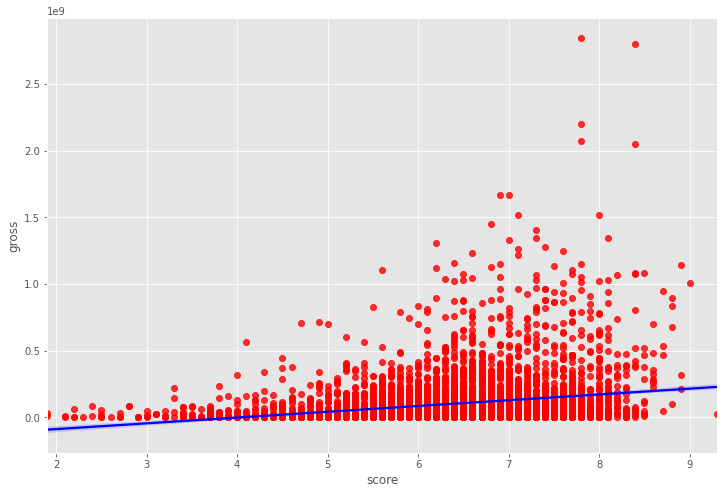

In [22]:
#plot budget vs gross use seaborns
sns.regplot(x="score", y="gross", data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [33]:
#let's start looking at correlation

In [23]:
df.corr() #pearson

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [24]:
df.corr(method ='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [25]:
df.corr(method ='kendall')



,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


In [26]:
df.corr(method ='spearman')

,score,votes,budget,gross,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


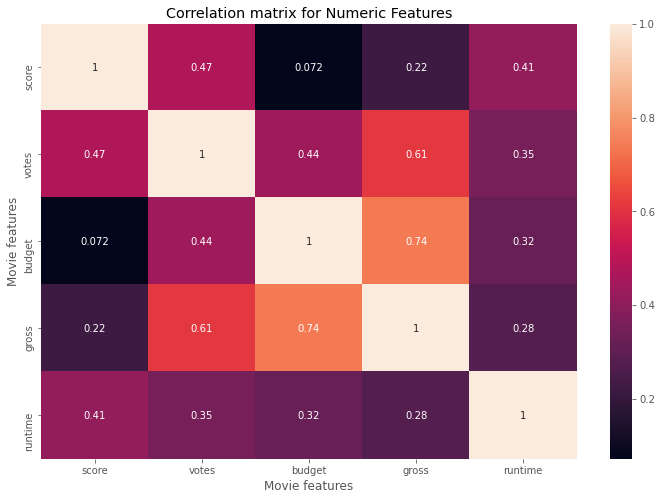

In [27]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [28]:
#look at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [44]:
#change company to numbers
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes   #random numeriztion

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,69,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,79,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,56,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,75,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,78,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [45]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,69,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,79,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,56,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,75,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,78,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


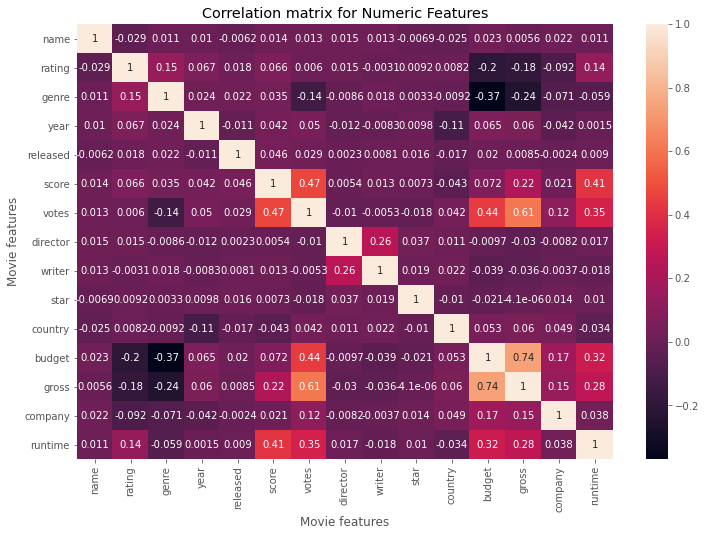

In [39]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [40]:
#high correlation
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.010185
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [41]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [43]:
high_correlation = sorted_pairs[(sorted_pairs)>0.5]
high_correlation

gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64